In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [36]:
np.set_printoptions(threshold=10)

## Generating Bivariate Classification Data

In [37]:
def generate_classification_data(size, classes=2, angle=None, sep=1, noise=1.25, n_features=2):
    means = np.linspace(-sep, sep, classes) * classes
    X = np.concatenate([np.random.normal(loc=means[i], 
                                         scale=noise, 
                                         size=(size // classes, n_features)) for i in range(classes)], axis=0)
    y = np.concatenate([np.zeros(size // classes) + i for i in range(classes)], axis=0)
    angle = angle if angle else np.random.randint(0, 181)
    theta = np.pi / 180 * angle
    R = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
    X = X @ R
    return X, y

In [38]:
X, y = generate_classification_data(500)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (400, 2)
X_test shape :  (100, 2)
y_train shape :  (400,)
y_test shape :  (100,)


In [41]:
plt.set_cmap('coolwarm')

<Figure size 432x288 with 0 Axes>

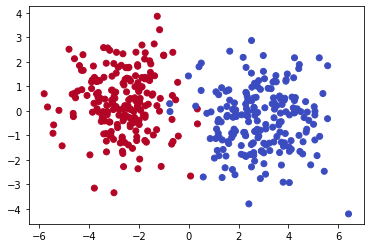

In [42]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

## K-Nearest Neighbors Classification Model

In [96]:
class KNNeighborsClassifier:
    def __init__(self, n_neighbors=7):
        self.n_neighbors = n_neighbors
        self.__X = None
        self.__y = None
        
    def __euclidean_distance(self, x1, x2):
        return np.sum((x1 - x2) ** 2, axis=-1) ** 0.5 
    
    def predict(self, X):
        if X.shape[-1] != self.__X.shape[-1]:
            raise f'shape mismatch {X.shape[-1]} != {self.__X.shape[-1]}, provide required number of features'
        class_labels = []
        for x in X:
            distances = self.__euclidean_distance(x, self.__X)
            indices = np.argsort(distances)[1: self.n_neighbors + 1]
            predicted_class = int(np.mean(self.__y[indices]))
            class_labels.append(predicted_class)
        return np.array(class_labels)
        
    def fit(self, X, y):
        self.__X = X
        self.__y = y
    
    def evaluate(self, X, y):
        '''returns accuracy of the model'''
        y_pred = self.predict(X)
        accuracy = np.mean(np.equal(y, y_pred))
        return accuracy
    
    def plot_prediction_boundary(self, X, y, n_features=None, ec='k', s=50, cmap=None, alpha=0.7):
        n_features = n_features if n_features else X.shape[-1]
        xx = [0] * n_features
        for i in range(n_features):
            xx[i] = np.arange(X[:, i].min() - 1, X[:, i].max() + 1, 0.1)

        figsize = np.array([n_features - 1, n_features])
        plt.figure(figsize=figsize * 7)
        n = 1
        for i in range(n_features):
            x = list(range(n_features))
            x.remove(i)
            for j in range(n_features - 1):
                plt.subplot(figsize[1], figsize[0], n)

                data_train = np.c_[X[:, i], X[:, j]]
                model.fit(data_train, y)

                X1, X2 = np.meshgrid(xx[i], xx[j])
                data_test = np.c_[X1.ravel(), X2.ravel()]
                data_pred = model.predict(data_test)

                Z = data_pred.reshape(xx[j].shape[0], xx[i].shape[0])

                extent=[X[:, i].min() - 1, X[:, i].max() + 1, X[:, j].min() - 1, X[:, j].max() + 1]
                plt.imshow(Z, origin='lower', extent=extent, alpha=alpha, aspect='auto')

                plt.scatter(X[:, i], X[:, j], c=y, ec=ec, s=s, cmap=cmap)
                plt.xlabel(f'X{x[j] + 1}')
                plt.ylabel(f'X{i + 1}')
                n += 1

## Training and Evaluation

In [97]:
model = KNNeighborsClassifier()

In [98]:
model.fit(X_train, y_train)

In [99]:
train_acc = model.evaluate(X_train, y_train)
print('training accuracy : ', train_acc)

training accuracy :  0.9725


In [100]:
test_acc = model.evaluate(X_test, y_test)
print('test accuracy : ', test_acc)

test accuracy :  0.93


## Model Performance for various values of K

Text(0.5, 1.0, 'Training Accuracy')

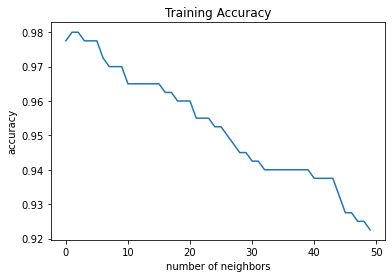

In [101]:
accuracy_per_k = []
for k in range(1, 51):
    model = KNNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc = model.evaluate(X_train, y_train)
    accuracy_per_k.append(train_acc)
plt.plot(accuracy_per_k)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('Training Accuracy')

### Chosing K (Number of Neighbours) = 5 

In [102]:
model = KNNeighborsClassifier(n_neighbors=5)

In [103]:
model.fit(X_train, y_train)

In [104]:
train_acc = model.evaluate(X_train, y_train)
print('training accuracy : ', train_acc)

training accuracy :  0.9775


In [105]:
test_acc = model.evaluate(X_test, y_test)
print('test accuracy : ', test_acc)

test accuracy :  0.93


## Prediction Boundary

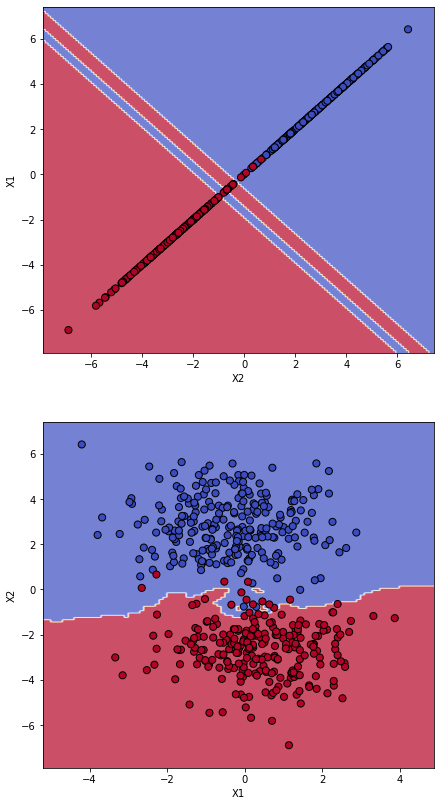

In [106]:
model.plot_prediction_boundary(X, y)

# Multiclass Classification on Iris Dataset

In [107]:
X, y = datasets. load_iris(return_X_y=True)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (120, 4)
X_test shape :  (30, 4)
y_train shape :  (120,)
y_test shape :  (30,)


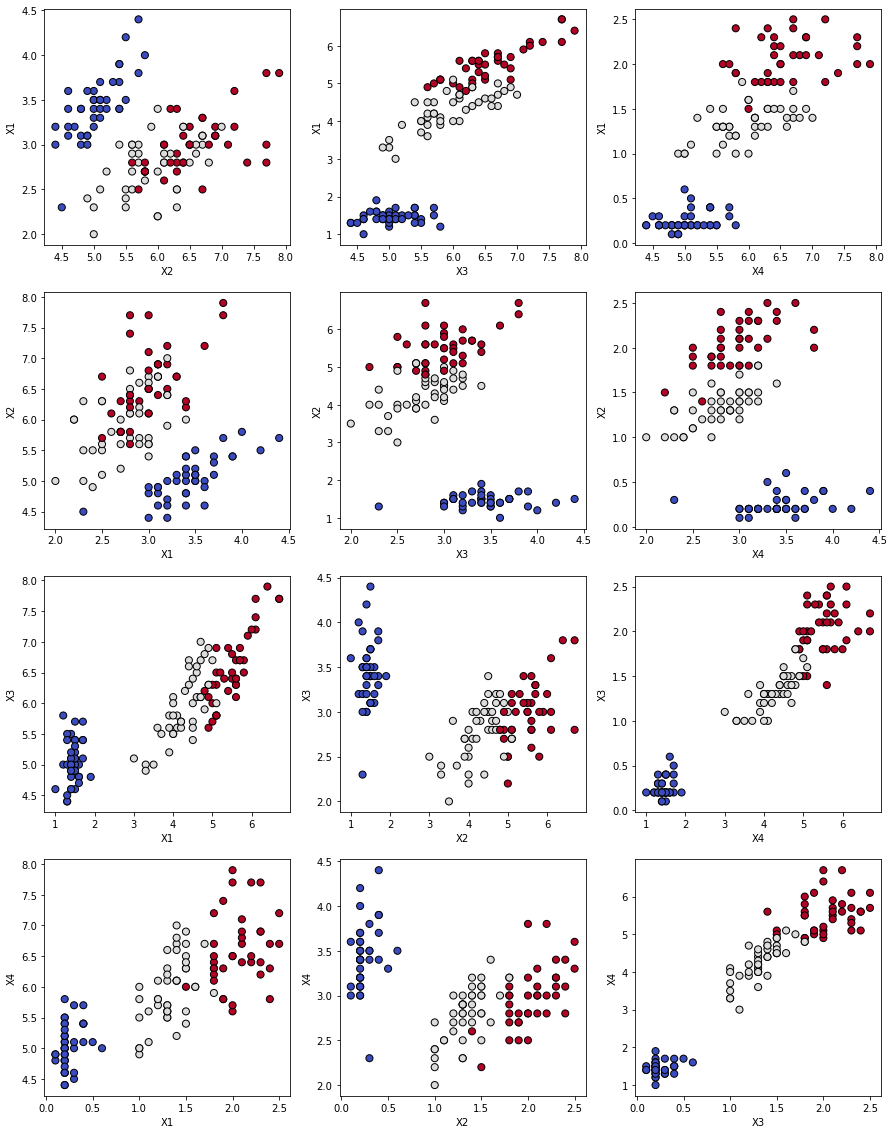

In [109]:
n_features = X_train.shape[-1]
plt.figure(figsize=(15, 20))
n = 1
for i in range(4):
    x = list(range(4))
    x.remove(i)
    for j in range(3):
        plt.subplot(4, 3, n)
        plt.scatter(X_train[:, i], X_train[:, x[j]], c=y_train, ec='k', s=50)
        plt.xlabel(f'X{x[j] + 1}')
        plt.ylabel(f'X{i + 1}')
        n += 1

## Training and Evaluation

In [110]:
model = KNNeighborsClassifier()

In [111]:
model.fit(X_train, y_train)

In [112]:
train_acc = model.evaluate(X_train, y_train)
print('training accuracy : ', train_acc)

training accuracy :  0.8916666666666667


In [113]:
test_acc = model.evaluate(X_test, y_test)
print('test accuracy : ', test_acc)

test accuracy :  0.9


## Finding the Best Model

Text(0.5, 1.0, 'training Accuracy')

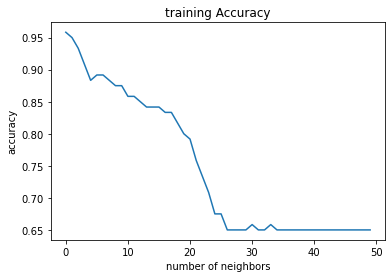

In [114]:
accuracy_per_k = []
for k in range(1, 51):
    model = KNNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc = model.evaluate(X_train, y_train)
    accuracy_per_k.append(train_acc)
plt.plot(accuracy_per_k)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('training Accuracy')

### Chosing K (Number of Neighbours) = 5 

In [115]:
model = KNNeighborsClassifier(n_neighbors=5)

In [116]:
model.fit(X_train, y_train)

In [117]:
train_acc = model.evaluate(X_train, y_train)
print('training accuracy : ', train_acc)

training accuracy :  0.8833333333333333


In [118]:
test_acc = model.evaluate(X_test, y_test)
print('testing accuracy : ', test_acc)

testing accuracy :  0.9


## Prediction Boundary

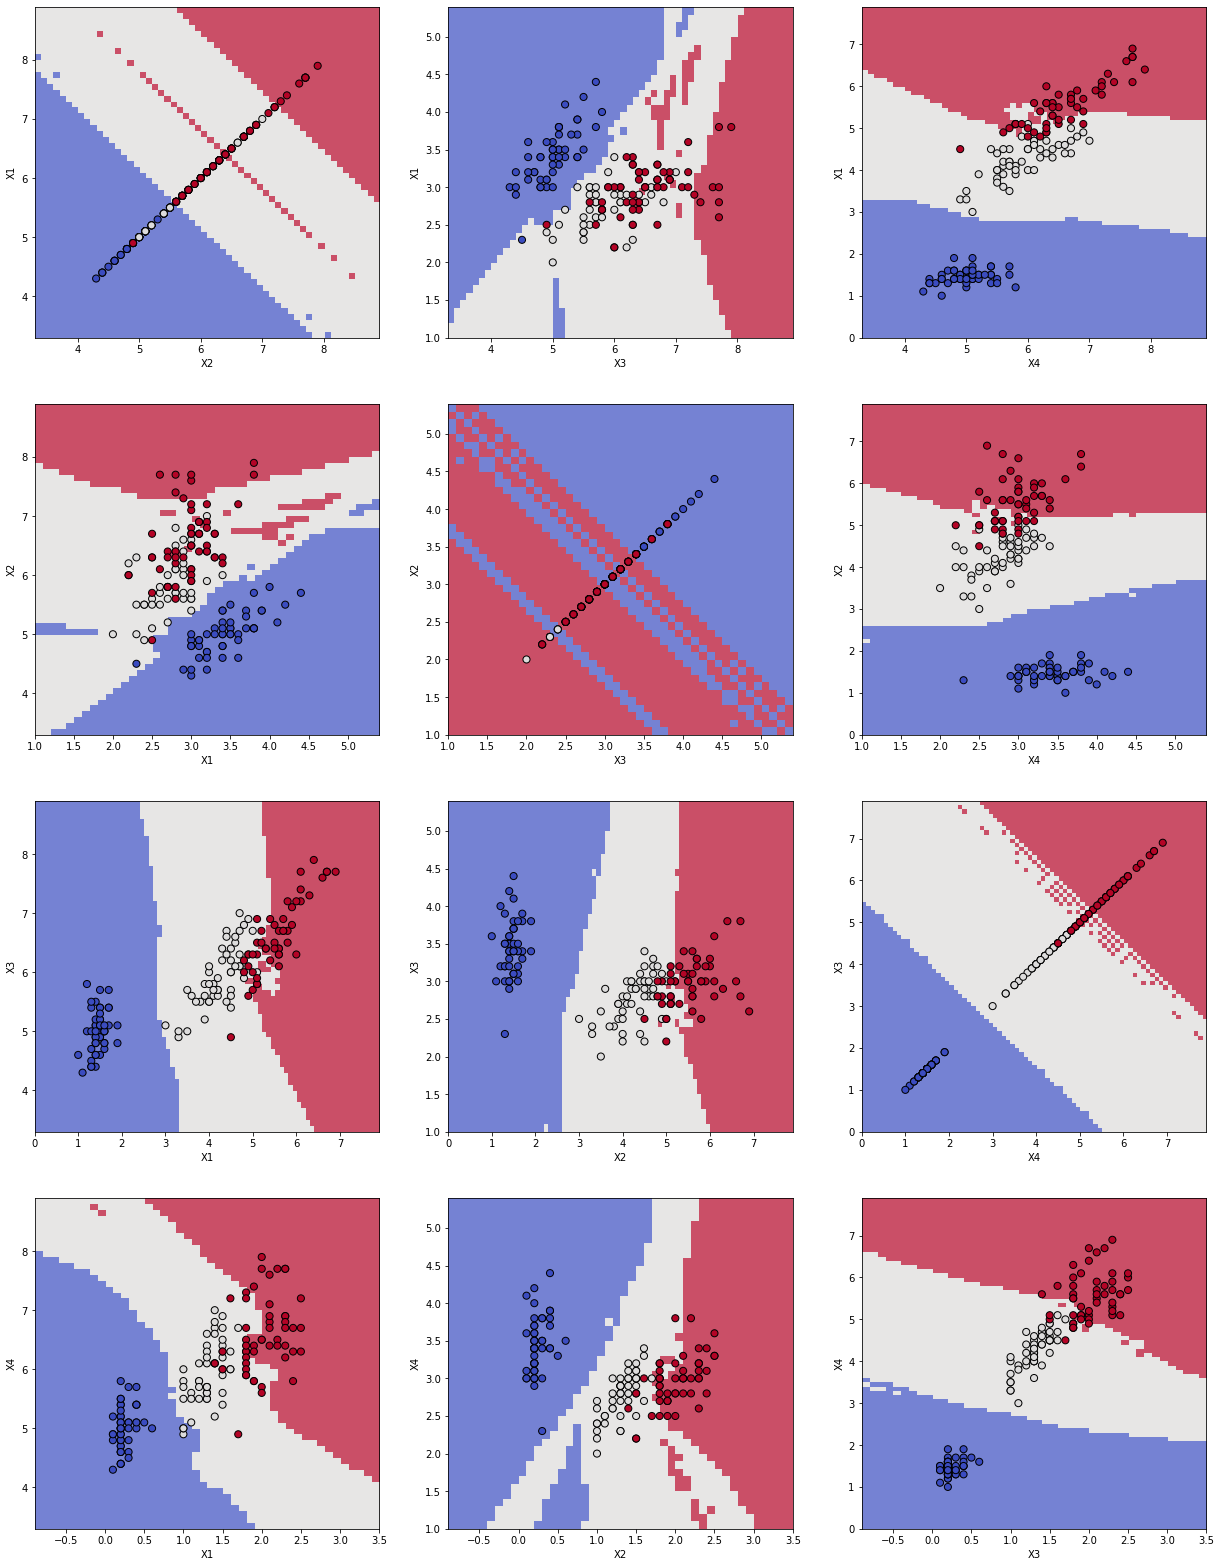

In [119]:
model.plot_prediction_boundary(X, y, alpha=0.7, ec='k', s=50)